# Seif Ahmed Elewa
## Task 6

### Imports

In [30]:
# Essential libraries imports
import numpy as np
import pandas as pd

# The model and validation imports
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Metrics Imports
from sklearn.metrics import classification_report ,confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score,roc_curve,roc_auc_score,f1_score,classification_report

# Tree drawing tools imports
from sklearn import tree
import pydotplus
from matplotlib import pyplot as plt
from dtreeviz.trees import dtreeviz 


In [31]:
# Import the data set
data_set = pd.read_csv("Iris.csv")
data_set

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Preparing the data

In [32]:
# Categorize and split the data to work on
categorize = preprocessing.LabelEncoder()
data_set=data_set.apply(categorize.fit_transform)
data_set

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,8,14,4,1,0
1,1,6,9,4,1,0
2,2,4,11,3,1,0
3,3,3,10,5,1,0
4,4,7,15,4,1,0
...,...,...,...,...,...,...
145,145,24,9,28,19,2
146,146,20,4,26,15,2
147,147,22,9,28,16,2
148,148,19,13,30,19,2


In [33]:
# Selecting our features ( Input and Output)
Features=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
X=data_set[Features]
Y=data_set['Species']


In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 42, stratify=Y,shuffle = True)

### Cross validation to increase accuarcy

In [35]:
# Setting our parameters options
parameters = {'max_depth' : (3,5,7)
              , 'criterion' : ('gini', 'entropy')
              , 'max_features' : ('auto', 'sqrt', 'log2')
              , 'min_samples_split' : (2,3,4,6,8,10)
             }

In [36]:
# Implementing the Random Search Cross Validation
DT_grid  = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions = parameters, cv = 5, verbose = True)
DT_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': (3, 5, 7),
                                        'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'min_samples_split': (2, 3, 4, 6, 8,
                                                              10)},
                   verbose=True)

In [37]:
# Looking for the best parameters
DT_grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='sqrt',
                       min_samples_split=10)

### Running the classifier

In [38]:
# Import our classifier and using the found parameters
DTree=DecisionTreeClassifier(max_depth=3, max_features='sqrt', min_samples_split=10)
DTree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, max_features='sqrt', min_samples_split=10)

In [39]:
# Predict our output 
Y_pred=DTree.predict(X_test)
Y_pred

array([2, 1, 2, 1, 2, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0,
       1, 2, 1, 1, 1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 1, 2, 1, 0, 1, 2,
       1])

### The tree output

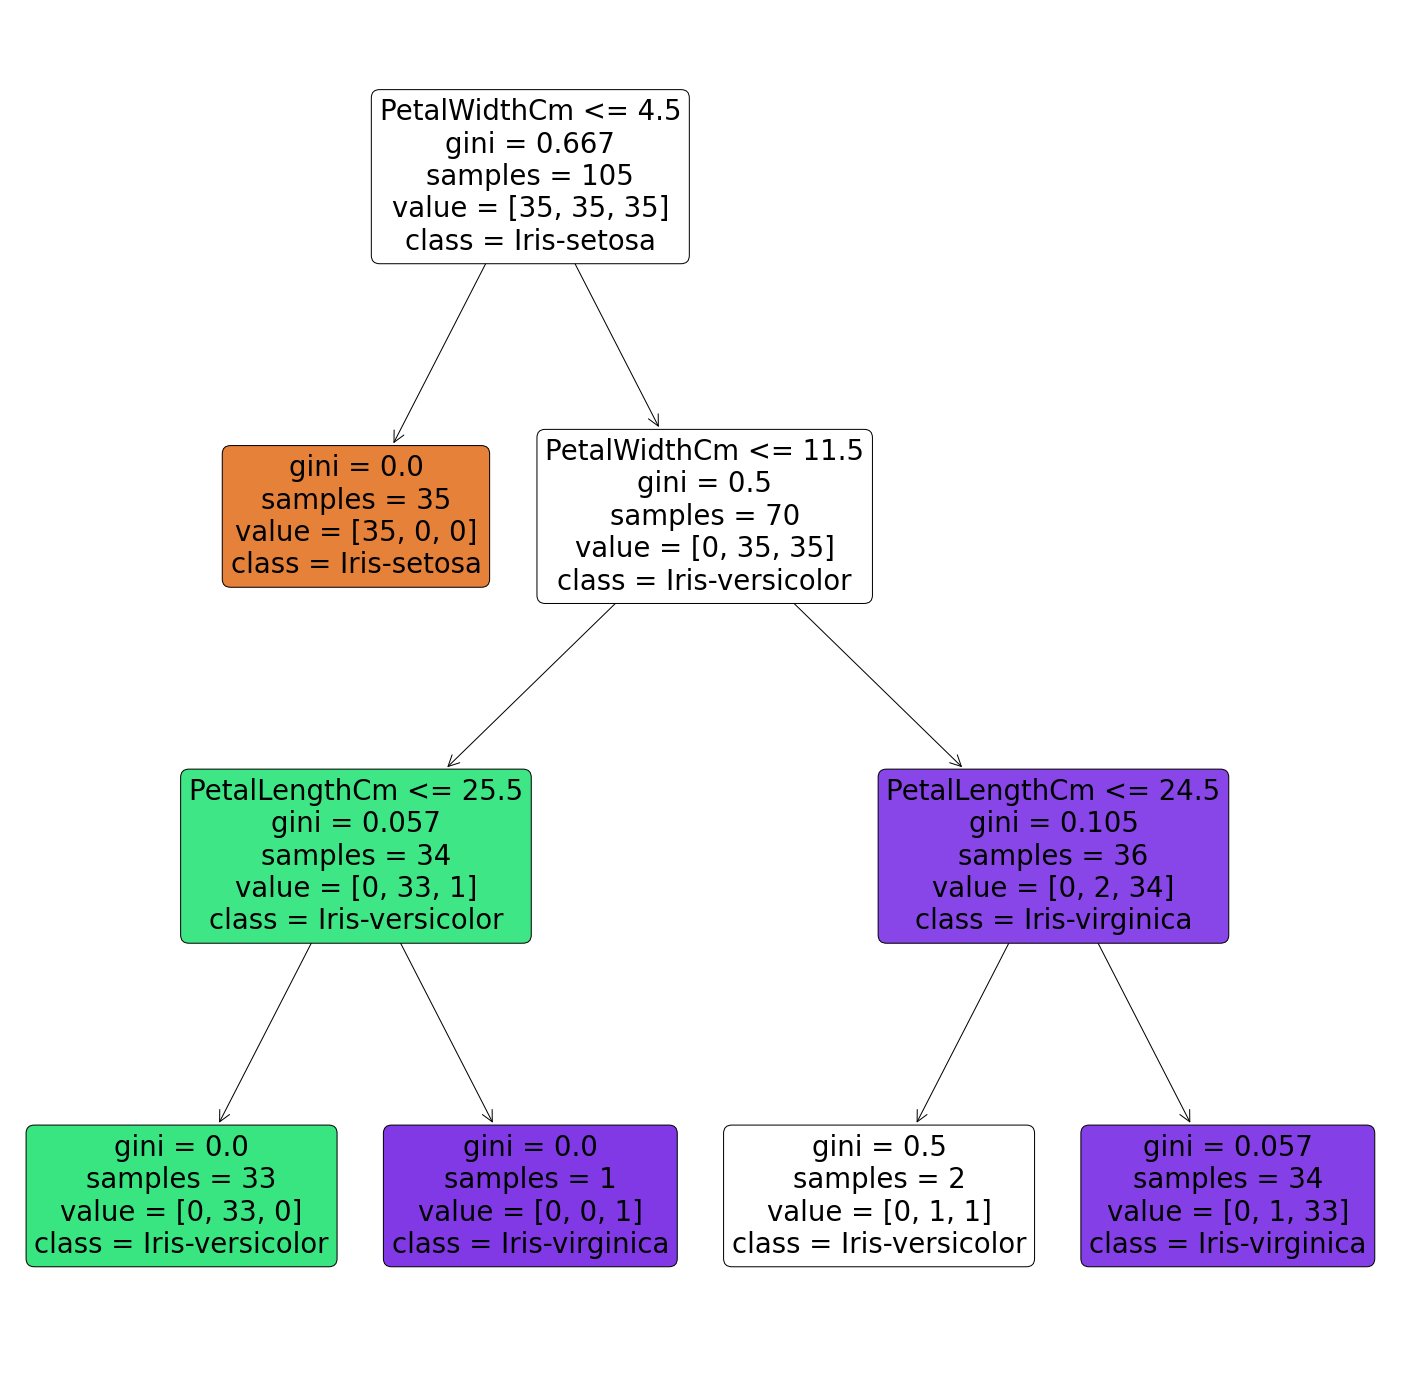

In [40]:
# Drawing our tree
fig = plt.figure(figsize=(25,25))
_ = tree.plot_tree(DTree, 
                   feature_names=Features,  
                   class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'],
                   filled=True,rounded=True)
fig.savefig("decistion_tree.png")

### Metrics to test efficiency

In [41]:
# Confusion matrix to collect the metrics
confusion_matrix(Y_test, Y_pred)

array([[14,  1,  0],
       [ 0, 14,  1],
       [ 0,  2, 13]], dtype=int64)

In [42]:
# Classification report for grouping the metrics
print(classification_report(Y_test, Y_pred, digits=3))

              precision    recall  f1-score   support

           0      1.000     0.933     0.966        15
           1      0.824     0.933     0.875        15
           2      0.929     0.867     0.897        15

    accuracy                          0.911        45
   macro avg      0.917     0.911     0.912        45
weighted avg      0.917     0.911     0.912        45



In [43]:
print(accuracy_score(Y_test,Y_pred))

0.9111111111111111
